<a href="https://colab.research.google.com/github/Leila828/DeepLearning_projects/blob/master/Brain_Tumor_MRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
masoudnickparvar_brain_tumor_mri_dataset_path = kagglehub.dataset_download('masoudnickparvar/brain-tumor-mri-dataset')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets/masoudnickparvar/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_124.jpg
/kaggle/input/datasets/masoudnickparvar/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_949.jpg
/kaggle/input/datasets/masoudnickparvar/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_786.jpg
/kaggle/input/datasets/masoudnickparvar/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_371.jpg
/kaggle/input/datasets/masoudnickparvar/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_599.jpg
/kaggle/input/datasets/masoudnickparvar/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_802.jpg
/kaggle/input/datasets/masoudnickparvar/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1323.jpg
/kaggle/input/datasets/masoudnickparvar/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1347.jpg
/kaggle/input/datasets/masoudnickparvar/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_955.jpg
/kaggle/input/datasets/masoudnickparvar/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_778.jpg
/kaggle/input/datasets/masou

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Dataset Configuration for Kaggle
# This dataset has 'Training' and 'Testing' folders already split
TRAIN_DIR = '/kaggle/input/datasets/masoudnickparvar/brain-tumor-mri-dataset/Training'
TEST_DIR = '/kaggle/input/datasets/masoudnickparvar/brain-tumor-mri-dataset/Testing'

2026-02-15 11:54:49.500758: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771156489.744172      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771156489.820289      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771156490.385807      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771156490.385915      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771156490.385918      55 computation_placer.cc:177] computation placer alr

In [ ]:

IMG_SIZE = (150, 150)
BATCH_SIZE = 32

# 2. Data Preparation
# Note: This dataset is already split into Training and Testing folders.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical' # 4 classes: Glioma, Meningioma, No Tumor, Pituitary
)

validation_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 5600 images belonging to 4 classes.
Found 1600 images belonging to 4 classes.


In [ ]:
# 3. Proposed Multi-class CNN Architecture
def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        # Change to 4 units for the 4 classes and softmax for multi-class probability
        layers.Dense(4, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
model = build_model()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-02-15 11:55:07.098131: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,454,660 (13.18 MB)

 Trainable params: 3,454,660 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 4. Training
EPOCHS = 15
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 174s 979ms/step - accuracy: 0.4233 - loss: 1.2002 - val_accuracy: 0.6681 - val_loss: 1.0132
Epoch 2/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 203s 987ms/step - accuracy: 0.7000 - loss: 0.7449 - val_accuracy: 0.6950 - val_loss: 1.1123
Epoch 3/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 163s 933ms/step - accuracy: 0.7588 - loss: 0.6224 - val_accuracy: 0.6762 - val_loss: 1.0433
Epoch 4/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 202s 934ms/step - accuracy: 0.7726 - loss: 0.5578 - val_accuracy: 0.7300 - val_loss: 0.9038
Epoch 5/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 164s 935ms/step - accuracy: 0.8065 - loss: 0.4834 - val_accuracy: 0.7631 - val_loss: 0.9249
Epoch 6/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 164s 938ms/step - accuracy: 0.8281 - loss: 0.4385 - val_accuracy: 0.7519 - val_loss: 0.9549
Epoch 7/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 164s 938ms/step - accuracy: 0.8336 - loss: 0.4214 - val_accuracy: 0.7788 - val_loss: 0.8829
Epoch 8/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 163s 933ms/step - accuracy: 0.8597 -

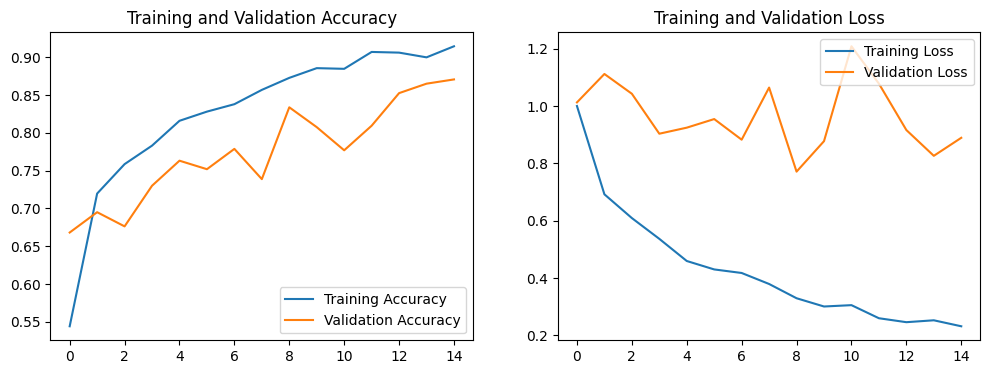

In [ ]:
# 5. Result Visualization
def plot_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend(loc='upper right')
    plt.show()

plot_results(history)



In [ ]:
# 6. Evaluation Metrics
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
cm = confusion_matrix(validation_generator.classes, y_pred)
print(cm)

print('\nClassification Report')
# Get class names from the generator
target_names = list(validation_generator.class_indices.keys())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

f1 = f1_score(validation_generator.classes, y_pred, average='weighted')
print(f"Final Weighted F1 Score: {f1:.4f}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 252ms/step
Confusion Matrix
[[285  49  55  11]
 [ 10 316  55  19]
 [  0   0 400   0]
 [  4   4   0 392]]

Classification Report
              precision    recall  f1-score   support

      glioma       0.95      0.71      0.82       400
  meningioma       0.86      0.79      0.82       400
     notumor       0.78      1.00      0.88       400
   pituitary       0.93      0.98      0.95       400

    accuracy                           0.87      1600
   macro avg       0.88      0.87      0.87      1600
weighted avg       0.88      0.87      0.87      1600

Final Weighted F1 Score: 0.8675
